Give now the desired parameters. Pressing enter will set the standard parameters


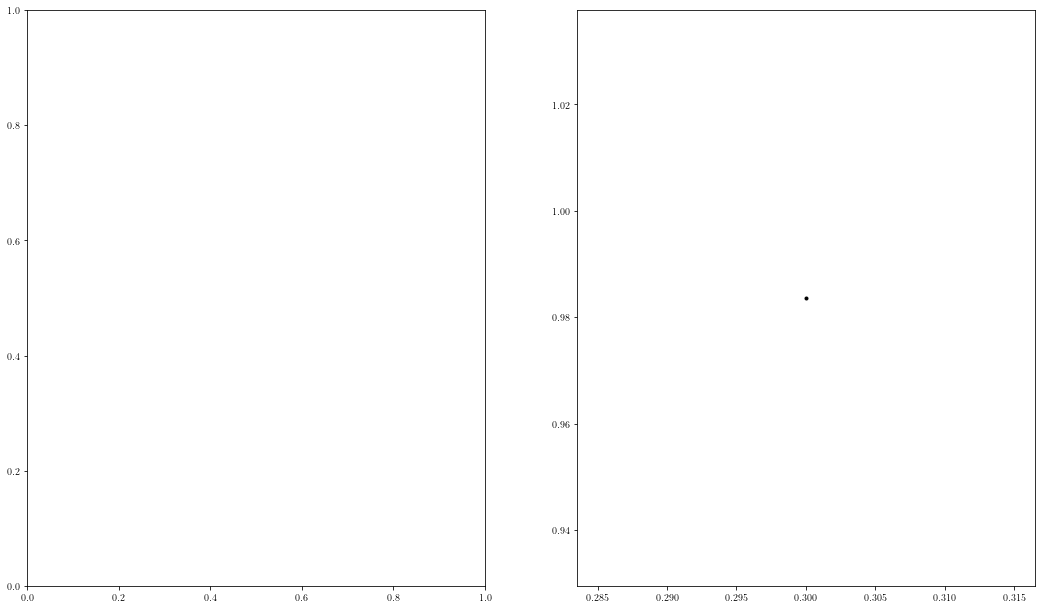

In [47]:
# Define parameters

print('Give now the desired parameters. Pressing enter will set the standard parameters')

Map = 0
alpha = 1
beta = 1.576
gamma = 1
A = 1.4
B = 1
Omega = 1.76
Picture = 1
k = 1
b = 0.25

# Call the function with the parameters
quasip(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b)



0.3 0.9836346542718686


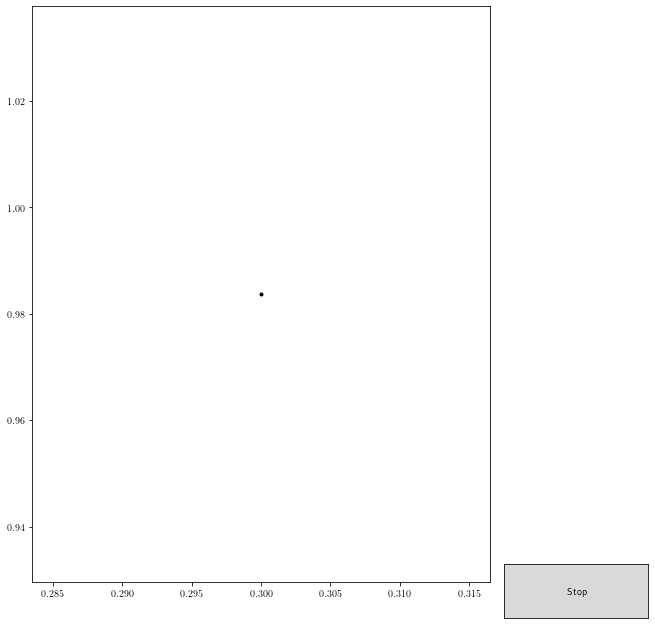

0.9836346542718686 0.7408798395552427
0.7408798395552427 0.6590848411874655
0.6590848411874655 0.5925224690855373
0.5925224690855373 0.4832803503709471
0.4832803503709471 0.25928090727609465
0.25928090727609465 0.8643966285745481
0.8643966285745481 0.7054576013105596
0.7054576013105596 0.6386853661846956
0.6386853661846956 0.5637811456318751
0.5637811456318751 0.42714268857940496
0.42714268857940496 0.1426438819905691
0.1426438819905691 0.7672199128876294
0.7672199128876294 0.6515882100976533
0.6515882100976533 0.5723664381676947
0.5723664381676947 0.44245952187799276
0.44245952187799276 0.17368766096175037
0.17368766096175037 0.7852872065995982
0.7852872065995982 0.6634461646717895


In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define the main function
def quasip(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b):

    animsteps = 32

    # User input for choosing between map and ODE
    Map = input('Choose Map=1 for the map and Map=0 for the differential equation\nMap = ')
    if not Map.isdigit() or int(Map) not in [0, 1]:
        raise ValueError('You have to set Map to 0 or 1')
    Map = int(Map)

    # Initialization of variables
    h = 2 * np.pi / (animsteps * Omega)  # Step size calculation

    # Initial state vector
    xc = np.array([0.3 * 2 * np.pi, 0.3, 0])
    yy = xc[0] / (2 * np.pi)  # Normalizing the first element of xc
    tn = yy
    rn = 0.3
    t = 0

    # Warning if Map is on in combination with Picture 3
    if Map == 1 and Picture == 3:
        print('The option Map is not compatible with Picture option 3, Picture option is set to 1')
        Picture = 1

    n = 1
    nit = 20
    
# Initialize the figure
    # fig, ax1, ax2 = init_figure()
    plt.show()

    # Clear current figure
    plt.clf()

    # Creating a 'Stop' button - this is a placeholder and might need further integration with GUI event loop
    # For full functionality, you might need to use a GUI framework like Tkinter
    stop_button = plt.axes([0.81, 0.05, 0.1, 0.075])
    button = plt.Button(stop_button, 'Stop')
    button.on_clicked(stopf)  # Linking to a stop function

    if Map == 0:
        # Create first subplot
        ax1 = plt.subplot(1, 2, 1)
        ax1.axis([-1.5, 1.5, -1.5, 1.5])
        ax1.set_aspect('equal', 'box')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Pendanim')

        # Create second subplot
        ax2 = plt.subplot(1, 2, 2)
    else:
        ax2 = plt.subplot(1, 1, 1)

    ax2.axis([0, 1, 0, 1])
    ax2.set_aspect('equal', 'box')

    # Set labels based on Picture value
    if Picture == 1:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\theta_{n+1}$', fontsize=12)
    elif Picture == 2:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\dot{\theta_n}$', fontsize=12)
        if Map == 0:
            ax2.axis([0, 1, -3, 3])
        else:
            ax2.axis([0, 1, -0.5, 0.5])
    elif Picture == 3:
        ax2.set_xlabel('t mod (2π / Ω)')
        ax2.set_ylabel('θ mod 2π')

    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)  # Adjust subplot to make room for button

    fig = plt.gcf()
    fig.set_size_inches(20, 10)  # Set the figure size to 20x10
    ax = plt.subplot(1, 2, 2)

    while n < nit:
        if Map == 0:
            b1 = np.sin(xc[0])
            b2 = -np.cos(xc[0])

            # Update state using Runge-Kutta method
            for i in range(animsteps):
                t += h
                xc = Runge(xc)

                # Clear and update the plot for pendulum
                plt.subplot(1, 2, 1).cla()
                plt.plot(0, 0, '+', markersize=10)
                plt.plot([0, b1], [0, b2], 'b-')
                plt.plot(b1, b2, 'r.', markersize=25)
                plt.pause(0.01)

                # Additional plotting based on Picture
                if Picture == 3:
                    # Implement the logic for 2D torus plot
                    pass  # Placeholder for the 2D torus plot logic

            tn = xc[0] / (2 * np.pi)
            rn = xc[1]

        else:
            # Logic when Map is switched on
            ro = rn
            to = tn
            rn = b * ro - k / (2 * np.pi) * np.sin(2 * np.pi * (to % 1))
            tn = to + Omega + rn

        # Plotting based on Picture
        if Picture == 1:
            yy = tn % 1
            xx = to % 1
            print(xx, yy)
            ax.plot(xx, yy, '.k')  # Plot on the existing subplot
            plt.pause(1)
        elif Picture == 2:
            yy = rn
            xx = tn % 1
            plt.subplot(1, 2, 2).plot(xx, yy, '.k')
            plt.pause(0.01)

        n += 1


quasip(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b)


Initialize the figure

In [33]:
import matplotlib.pyplot as plt

def init_figure():
    # Clear current figure
    plt.clf()

    # Creating a 'Stop' button - this is a placeholder and might need further integration with GUI event loop
    # For full functionality, you might need to use a GUI framework like Tkinter
    stop_button = plt.axes([0.81, 0.05, 0.1, 0.075])
    button = plt.Button(stop_button, 'Stop')
    button.on_clicked(stopf)  # Linking to a stop function

    if Map == 0:
        # Create first subplot
        ax1 = plt.subplot(1, 2, 1)
        ax1.axis([-1.5, 1.5, -1.5, 1.5])
        ax1.set_aspect('equal', 'box')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Pendanim')

        # Create second subplot
        ax2 = plt.subplot(1, 2, 2)
    else:
        ax2 = plt.subplot(1, 1, 1)

    ax2.axis([0, 1, 0, 1])
    ax2.set_aspect('equal', 'box')

    # Set labels based on Picture value
    if Picture == 1:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\theta_{n+1}$', fontsize=12)
    elif Picture == 2:
        ax2.set_xlabel(r'$\theta_n$', fontsize=12)
        ax2.set_ylabel(r'$\dot{\theta_n}$', fontsize=12)
        if Map == 0:
            ax2.axis([0, 1, -3, 3])
        else:
            ax2.axis([0, 1, -0.5, 0.5])
    elif Picture == 3:
        ax2.set_xlabel('t mod (2π / Ω)')
        ax2.set_ylabel('θ mod 2π')

    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)  # Adjust subplot to make room for button

    fig = plt.gcf()
    fig.set_size_inches(20, 10)  # Set the figure size to 20x10

    
    while n < nit:
        if Map == 0:
            b1 = np.sin(xc[0])
            b2 = -np.cos(xc[0])

            # Update state using Runge-Kutta method
            for i in range(animsteps):
                t += h
                xc = Runge(xc)

                # Clear and update the plot for pendulum
                plt.subplot(1, 2, 1).cla()
                plt.plot(0, 0, '+', markersize=10)
                plt.plot([0, b1], [0, b2], 'b-')
                plt.plot(b1, b2, 'r.', markersize=25)
                plt.pause(0.01)

                # Additional plotting based on Picture
                if Picture == 3:
                    # Implement the logic for 2D torus plot
                    pass  # Placeholder for the 2D torus plot logic

            tn = xc[0] / (2 * np.pi)
            rn = xc[1]

        else:
            # Logic when Map is switched on
            ro = rn
            to = tn
            rn = b * ro - k / (2 * np.pi) * np.sin(2 * np.pi * (to % 1))
            tn = to + Omega + rn

        # Plotting based on Picture
        if Picture == 1:
            yy = tn % 1
            xx = to % 1
            plt.subplot(1, 2, 2).plot(xx, yy, '.k')
            plt.pause(0.01)
        elif Picture == 2:
            yy = rn
            xx = tn % 1
            plt.subplot(1, 2, 2).plot(xx, yy, '.k')
            plt.pause(0.01)

        n += 1

    return fig, ax1 if Map == 0 else None, ax2


Functions equations, Runge, stopf

In [26]:
import numpy as np

# Global variables
global alpha, beta, gamma, A, B, Omega, h

def equations(x):
    # Define the differential equations
    f = np.zeros(3)
    f[0] = x[1]
    f[1] = 1 / alpha * (-beta * x[1] - gamma * np.sin(x[0]) + A + B * np.cos(Omega * x[2]))
    f[2] = 1
    return f

def Runge(xc):
    # Runge-Kutta 4th order method
    n = len(xc)
    x = np.zeros_like(xc)
    c1 = np.zeros_like(xc)
    c2 = np.zeros_like(xc)
    c3 = np.zeros_like(xc)
    c4 = np.zeros_like(xc)

    for i in range(n):
        x[i] = xc[i]
    f = equations(x)
    for i in range(n):
        c1[i] = h * f[i]

    for i in range(n):
        x[i] = xc[i] + c1[i] / 2
    f = equations(x)
    for i in range(n):
        c2[i] = h * f[i]

    for i in range(n):
        x[i] = xc[i] + c2[i] / 2
    f = equations(x)
    for i in range(n):
        c3[i] = h * f[i]

    for i in range(n):
        x[i] = xc[i] + c3[i]
    f = equations(x)
    for i in range(n):
        c4[i] = h * f[i]

    for i in range(n):
        xc[i] = xc[i] + (c1[i] + 2 * c2[i] + 2 * c3[i] + c4[i]) / 6

    return xc

def stopf(event):
    # Event handler for the stop button
    # In a GUI application, this would terminate the event loop or close the window
    pass  # Placeholder, functionality depends on GUI framework used
